## Linear Regression

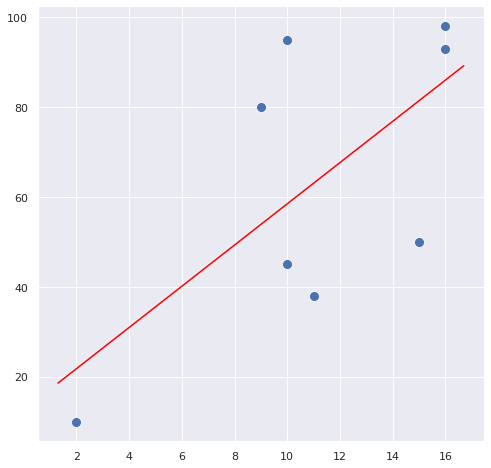

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc = {'figure.figsize':(8,8)})


data = [
        (10, 95),
        (9, 80),
        (2, 10),
        (15, 50),
        (10, 45),
        (16, 98),
        (11, 38),
        (16, 93),
]


## List of X and Y Cordinates
x = [pt[0] for pt in data]
y = [pt[1] for pt in data]

n = len(x)
xx= [a*a for a in x]
xy = [x[i]*y[i] for i in range(n)]

s_x = np.sum(x)
s_y = np.sum(y)
s_xx = np.sum(xx)
s_xy = np.sum(xy)


m = (n*s_xy -s_x*s_y)/(n*s_xx - s_x*s_x)
b= (s_y - m*s_x)/n

def plot_graph(x, y, slope, intercept):
    axes = sns.scatterplot(x=x, y=y, s=100)
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='red')
  
plot_graph(x, y, m, b)

## Decision Tree

In [135]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import sklearn
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 


class DecisionTreeClassifiers():
    def __init__(self, *,
                 criterion="gini",
                 splitter="best",
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features=None,
                 random_state=None,
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 class_weight=None,
                 ccp_alpha=0.0):
        super().__init__(
            criterion=criterion,
            splitter=splitter,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=min_weight_fraction_leaf,
            max_features=max_features,
            max_leaf_nodes=max_leaf_nodes,
            class_weight=class_weight,
            random_state=random_state,
            min_impurity_decrease=min_impurity_decrease,
            min_impurity_split=min_impurity_split,
            ccp_alpha=ccp_alpha)

    def fit(self, X, y, sample_weight=None, check_input=True,
            X_idx_sorted="deprecated"):

        super().fit(
            X, y,
            sample_weight=sample_weight,
            check_input=check_input,
            X_idx_sorted=X_idx_sorted)
        return self

    def predict_proba(self, X, check_input=True):
        check_is_fitted(self)
        X = self._validate_X_predict(X, check_input)
        proba = self.tree_.predict(X)

        if self.n_outputs_ == 1:
            proba = proba[:, :self.n_classes_]
            normalizer = proba.sum(axis=1)[:, np.newaxis]
            normalizer[normalizer == 0.0] = 1.0
            proba /= normalizer

            return proba

        else:
            all_proba = []

            for k in range(self.n_outputs_):
                proba_k = proba[:, k, :self.n_classes_[k]]
                normalizer = proba_k.sum(axis=1)[:, np.newaxis]
                normalizer[normalizer == 0.0] = 1.0
                proba_k /= normalizer
                all_proba.append(proba_k)

            return all_proba

    def predict_log_proba(self, X):
        proba = self.predict_proba(X)

        if self.n_outputs_ == 1:
            return np.log(proba)

        else:
            for k in range(self.n_outputs_):
                proba[k] = np.log(proba[k])

            return proba


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

y_pred = regressor.predict([[3750]])

from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

#--
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Production Cost')
  
# specify Y axis label
plt.ylabel('Profit')
  
# show the plot
plt.show()

### Else

In [133]:
class Node:
  def __init__(self, feature_values, feature_name, impurity):
    self.true = True
    self.false = False
    self.feature_values = feature_values
    self.feature_name = feature_name
    self.impurity = impurity
  
  def get_feature_values(self):
    return self.feature_values
  
  def get_impurity(self):
    return self.impurity
  
  def get_true(self):
    return self.true
  
  def get_false(self):
    return self.false
  
  def get_feature_name(self):
    return self.feature_name
  
  def set_true(self, node):
    if node is None:
      node = True
    self.true = node
  
  def set_false(self, node):
    if node is None:
      node = False
    self.false = node
  
  def __str__(self):
    return f"{self.get_feature_name()}"


class DecisionTree:
  def __init__(self):
    self.tree = None

  def __weighted_values(self, v1, v2):
    if (v1 + v2) == 0:
      return 0, 0
    return v1/(v1 + v2), v2/(v1 + v2)

  def __gini(self, true_count, false_count):
    t1, t2 = self.__weighted_values(true_count, false_count)
    return 1.0 - t1*t1 - t2*t2
  
  def __get_node_impurity(self, mat):
    g_false = self.__gini(mat[0][1], mat[0][0])
    g_true = self.__gini(mat[1][1], mat[1][0])
    w_false, w_true = self.__weighted_values(mat[0][0]+mat[0][1], mat[1][0] + mat[1][0])
    return w_false * g_false + w_true * g_true

  def __get_power_set(self, lis):
    n = len(lis)
    ps = []
    for i in range(1, pow(2, n) - 1, 1):
      bin = format(i,str(n))
      ret = []
      for j in range(len(bin)):
        if bin[j] == '1':
          ret.append(lis[i]) 
      ps.append(ret)
    return ps

  def __get_feature_atomic_impurity(self, X, y, feature):
    best_impurity = 100
    best_node = None
    unique_values = X[feature].unique()

    for uniques in self.__get_power_set(unique_values):
      mat = [
          # True False
          [0, 0], # True wrt feature
          [0, 0] # False ,,   ,,
      ]
      for i in range(X.shape[0]):
        r = int(X.iloc[i][feature] in uniques)
        c = int(y[i])
        mat[r][c] += 1
      impurity = self.__get_node_impurity(mat)
      if impurity < best_impurity:
        best_impurity = impurity
        best_node = Node(uniques, feature, impurity)
    return best_node, best_impurity


  def __get_best_node(self, X, y):
    features = list(X.columns)

    best_impurity = 100
    best_node = None

    for feature in features:
      node, impurity = self.__get_feature_atomic_impurity(X, y, feature)
      if impurity < best_impurity:
        best_impurity = impurity
        best_node = node
    return best_node, best_impurity

  def __get_child_data(self, X, y, parent_node):
    feature_name = parent_node.get_feature_name()
    feature_values = parent_node.get_feature_values()

    X_false = X.copy()
    X_true = X.copy()

    false_lis, true_lis = [], []

    for i in range(X.shape[0]):
      if X.iloc[i][feature_name] in feature_values:
        true_lis.append(i)
      else:
        false_lis.append(i)
        
    X_false = X_false.drop(labels = true_lis, axis = 0).drop(feature_name, axis = 1)
    X_true = X_true.drop(labels = false_lis, axis = 0).drop(feature_name, axis = 1)
    y_false = np.delete(y, true_lis, axis = 0)
    y_true = np.delete(y, false_lis, axis = 0)

    return (X_false.reset_index().drop("index", axis = 1), y_false, 
        X_true.reset_index().drop("index", axis=1), y_true)

  def __build_tree(self, X, y, parent_impurity = 100):
    if X.empty:
      return None
    feature_node, impurity = self.__get_best_node(X, y)
    if impurity >= parent_impurity:
      return None

    X_false, y_false, X_true, y_true = self.__get_child_data(X, y, feature_node)

    feature_node.set_true(self.__build_tree(X_true, y_true, impurity))
    feature_node.set_false(self.__build_tree(X_false, y_false, impurity))
    return feature_node
    
  def fit(self, X, y):
    self.tree = self.__build_tree(X, y)
  
  def __predict_single(self, x, parent):
    if type(parent) == bool:
      return parent
    
    feature_name = parent.get_feature_name()
    feature_values = parent.get_feature_values()

    val = x[feature_name]

    if val in feature_values:
      return self.__predict_single(x, parent.get_true())
    return self.__predict_single(x, parent.get_false())

  def predict(self, X):
    preds = []
    for i in range(X.shape[0]):
      pred = self.__predict_single(X.iloc[i], self.tree)
      preds.append(pred)
    return preds


df = pd.read_csv('dataset.csv').drop("ID", axis = 1)
X_train = df.copy().drop("Buys", axis = 1).drop([df.shape[0]-1], axis=0)
X_test = df.iloc[df.shape[0]-1:].drop("Buys", axis = 1)
y_train = np.array(df["Buys"].drop([df.shape[0]-1], axis = 0)) == "Yes"
print(X_train)
print(X_test)


dt = DecisionTree()
dt.fit(X_train, y_train)
print(dt.tree.get_feature_name())
print(dt.predict(X_test))

from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

FileNotFoundError: ignored

## KNN

In [131]:
import math
points = {0:[(2, 4),(4, 2),(4, 6),(6, 4)], 
            1:[(4,4),(6,2)]}
def KNN(weighted = False ,p =(6,1),k=3):
  distance=[]
  for group in points:
    for i in points[group]:
      euc_d = math.sqrt((p[0]-i[0])**2 + (p[1]-i[1])**2)
      distance.append([euc_d,group])
    
  
  d = sorted(distance)[:k]
  print(d)

  if weighted:
    freq0=0
    freq1=0

    for i in d:
      if(i[1]==0):
        freq0 = freq0 + (1/i[0])
      else:
        freq1 = freq1 + (1/i[0])
    if(freq1>freq0):
      return 1
    else:
      return 0
  else :
    counts={0:[], 1:[]}
    for i in d:
      print(i)
      
      counts[i[1]].append(1/i[0])
      
    print(counts)
    for c in counts:
      
      counts[c] = np.mean(counts[c])
    print(counts)
    return max(counts, key = lambda i: counts[i])

KNN()

[[1.0, 1], [2.23606797749979, 0], [3.0, 0]]
[1.0, 1]
[2.23606797749979, 0]
[3.0, 0]
{0: [0.4472135954999579, 0.3333333333333333], 1: [1.0]}
{0: 0.3902734644166456, 1: 1.0}


1

## K Means

  Points  x_coordinate  y_coordinate
0     P1          0.10          0.60
1     P2          0.15          0.71
2     P3          0.08          0.90
3     P4          0.16          0.85
4     P5          0.20          0.30
[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.2  0.3 ]
 [0.25 0.5 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]
[[0.1 0.6]
 [0.3 0.2]]
0.7071067811865476
[0. 0. 0. 0. 1. 0. 1. 1.]
[array([0.1, 0.6]), array([0.15, 0.71]), array([0.08, 0.9 ]), array([0.16, 0.85]), array([0.25, 0.5 ])]
[0.148 0.712]
[array([0.2, 0.3]), array([0.24, 0.1 ]), array([0.3, 0.2])]
[0.24666667 0.2       ]
0.1330129484089592
[0. 0. 0. 0. 1. 0. 1. 1.]
[array([0.1, 0.6]), array([0.15, 0.71]), array([0.08, 0.9 ]), array([0.16, 0.85]), array([0.25, 0.5 ])]
[0.148 0.712]
[array([0.2, 0.3]), array([0.24, 0.1 ]), array([0.3, 0.2])]
[0.24666667 0.2       ]
0.0
New centroids are : 
[0.24666667 0.2       ]
[0.148 0.712]
**
For centroid 0
[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.25 0.5 ]]
For centr

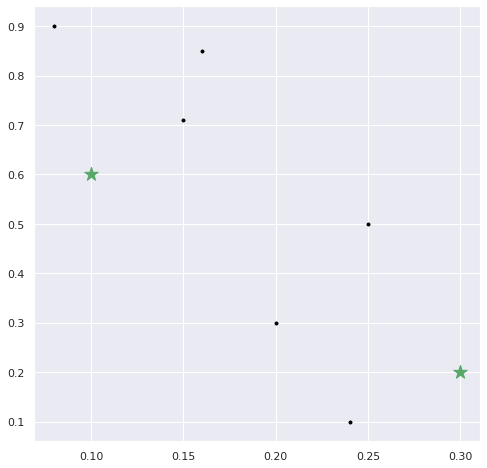

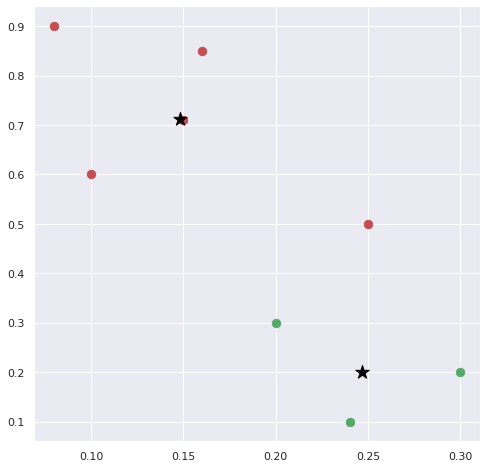

In [130]:
import numpy as np
import seaborn as sns
from copy import deepcopy
from matplotlib import pyplot as plt
import pandas as pd

#Given Dataset
dataset = {
'Points':['P1','P2','P3','P4','P5','P6','P7','P8',],
'x_coordinate':[0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3],
'y_coordinate':[0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2]
}

df = pd.DataFrame(dataset,columns=['Points','x_coordinate','y_coordinate'])
print(df.head())

# Getting the values and plotting it
f1 = df['x_coordinate'].values
f2 = df['y_coordinate'].values
plt.scatter(f1, f2, color='black', s=7)
plt

def dist(a,b , ax=1):
  return np.linalg.norm(a-b,axis=ax)


## Initial Centroids
k=2
X = np.array(list(zip(f1, f2)))
Centroid_m1 = list(X[0])
Centroid_m2 = list(X[7])
print(X)

c = np.array([Centroid_m1,Centroid_m2])
print(c)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(Centroid_m1[0],Centroid_m1[1] ,marker='*', s=200, c='g')
plt.scatter(Centroid_m2[0],Centroid_m2[1] ,marker='*', s=200, c='g')

## To store the old Centroids
c_old=np.zeros(c.shape)
cluster = np.zeros(len(X))
err = dist(c,c_old,None)
print(err)
while err!=0:
  for i in range(len(X)):
    d = dist(X[i],c)
    cen = np.argmin(d)
    cluster[i] = cen
  print(cluster)
  c_old = deepcopy(c)
  for i in range(k):
    points = [X[j] for j in range(len(X)) if cluster[j]==i]
    print(points)
    c[i] = np.mean(points,axis=0)
    print(c[i])
  err = dist(c,c_old,None)
  print(err)


print("New centroids are : ")
print(c[1])
print(c[0])
print("**")


colors = ['r', 'g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if cluster[j] == i])
        print("For centroid",i)
        print(points)
        ax.scatter(points[:, 0], points[:, 1], s=70, c=colors[i])

ax.scatter(c[:, 0], c[:, 1], marker='*', s=200, c='#050505')

## SDES

In [ ]:
import random

## Initialized the constants
P10 = [] # Random permutation of size 10
P8 = [] # Sample 8 elemets from P10 
P4 = [] # Permutation of size 4
EP = [] # Shuffle two permutations of size 4 # Expansion permutation
IP = [] # # Random permutation of size 8 # Initial permutation
IP_INV = [] # To be calculated from IP IP_INV[IP[i] - 1] = i + 1

def gen_random_permutation(n):
  out = [i+1 for i in range(n)]
  random.shuffle(out)
  return out;

IP = gen_random_permutation(8)
IP_INV = [1]*8
for i in range(len(IP)):
  IP_INV[IP[i]-1] = i+1

EP = gen_random_permutation(4)*2
P10 = gen_random_permutation(10)
P4 = gen_random_permutation(4)
P8 = random.sample(gen_random_permutation(10), 8)


S0 = [
    [1, 0, 3, 2],
    [3, 2, 1, 0],
    [0, 2, 1, 3],
    [3, 1, 3, 2]
]
S1 = [
    [0, 1, 2, 3],
    [2, 0, 1, 3],
    [3, 0, 1, 0],
    [2, 1, 0, 3]
]

## Helper Functions
def bin_to_dec(x):
  return int(x, 2)
def dec_to_bin(x):
  return bin(x).replace("0b","")
def left_circular_shift(x, shifts=1):
  shifts = shifts % len(x)
  return x[shifts:] + x[:shifts]
def permutate(key, perm):
  ret = ""
  for k in perm:
    ret += key[k-1]
  return ret
def split_str(key):
  half = len(key)//2
  key1 = key[:half]
  key2 = key[half:]
  return key1, key2
def xor(a, b):
  ret = ""
  for i in range(len(a)):
    if a[i] == b[i]: ret += "0"
    else: ret += "1"
  return ret


## Algorithm necessary functions
def gen_subkeys(key):
  n_key = permutate(key, P10)

  left_key, right_key = split_str(n_key)

  left_key = left_circular_shift(left_key, 1)
  right_key = left_circular_shift(right_key, 1)

  k1 = permutate(left_key + right_key, P8)

  left_key = left_circular_shift(left_key, 2)
  right_key = left_circular_shift(right_key, 2)

  k2 = permutate(left_key + right_key, P8)

  return k1, k2

def s_box(text, s):
  r = text[0] + text[3]
  c = text[1] + text[2]

  r = bin_to_dec(r)
  c = bin_to_dec(c)
  out = s[r][c]
  out = dec_to_bin(out)
  while len(out) < 2:
    out = "0" + out
  return out

def function(left, right, subkey):
  text = right
  text = permutate(text, EP)
  text = xor(text, subkey)
  text_left, text_right = split_str(text)
  text = s_box(text_left, S0) + s_box(text_right, S1)
  text = permutate(text, P4)
  text = xor(text, left)
  return text, right

def encryption(plaintext, key):
  k1, k2 = gen_subkeys(key)

  ciphertext = permutate(plaintext, IP)

  left, right = split_str(ciphertext)
  left, right = function(left, right, k1)

  left, right = right, left

  left, right = function(left, right, k2)

  ciphertext = permutate(left + right, IP_INV)

  return ciphertext

def decryption(ciphertext, key):
  k1, k2 = gen_subkeys(key)

  plaintext = permutate(ciphertext, IP)

  left, right = split_str(plaintext)
  left, right = function(left, right, k2)

  left, right = right, left

  left, right = function(left, right, k1)

  plaintext = permutate(left + right, IP_INV)

  return plaintext

## Testing
key = "1010001011"
plaintext = "10001010"
c = encryption(plaintext, key)
p = decryption(c, key)
assert(p==plaintext)
print(p)

## DFH

In [ ]:
### PUBLIC KEYS
P = 17
G = 27

### PRIVATE KEYS
a = 13
b = 9

### GENERATE KEYS
x= G**a % P
y= G**b % P

print(x,y)

## Shareed secret

s_a = y**a % P
s_b = x**b % P

print(s_a,s_b)

#------

def fpow(a, b, m):
  if b == 0:
    return 1
  r = fpow(a, b//2, m)
  r = (r * r) % m
  if b % 2 == 1:
    r = (r * a) % m
  return r

# Both the persons will be agreed upon the
# public keys G and P
# A prime number P is taken
P = 23

# A primitive root for P, G is taken
# Calculating G (primitive root)
G = 0
for r in range(1, P, 1):
  s = set()
  for x in range(P-1):
    s.add(fpow(r, x, P))
  if len(s) == P-1:
    G = r
    break;
print(G)


print('The Value of P is :%d'%(P))
print('The Value of G is :%d'%(G))

# Alice will choose the private key a
a = 4
print('The Private Key a for Alice is :%d'%(a))

# gets the generated key
x = int(fpow(G,a,P))

# Bob will choose the private key b
b = 3
print('The Private Key b for Bob is :%d'%(b))

# gets the generated key
y = int(fpow(G,b,P))


# Secret key for Alice
ka = int(fpow(y,a,P))

# Secret key for Bob
kb = int(fpow(x,b,P))

print('Secret key for the Alice is : %d'%(ka))
print('Secret Key for the Bob is : %d'%(kb))



11 7
6 6
5
The Value of P is :23
The Value of G is :5
The Private Key a for Alice is :4
The Private Key b for Bob is :3
Secret key for the Alice is : 18
Secret Key for the Bob is : 18


## RSA

In [ ]:
#RSA

def gcd(a, b):
  if a==0:
    return b
  else:
    return gcd(b%a, a)

# Selecting 2 prime numbers
P = 53
Q = 59

public_1 = P*Q
phi_public_1 = (P-1)*(Q-1)

# Generate 1 < public_2 < phi_public_1
public_2 = 2
while public_2 < phi_public_1:
  if gcd(public_2, phi_public_1) == 1:
    break
  public_2+=1


# Generate private key
k = 3
while (k * phi_public_1 + 1) % public_2 !=0:
  k+=1

private_key = (k * phi_public_1 + 1) // public_2
public_key = [public_2, public_1]

# Input data
input = 89

# Encrypt
encrypted_data = input ** public_2 % public_1
print(encrypted_data)

# Decrypt
decrypted_data = encrypted_data ** private_key % public_1
print(decrypted_data)

1394
89



## ECC


In [ ]:
import math
import random

def generator(a,b):
  x=1
  while True:
    rhs = x**3 + a*x +b
    y = int(math.sqrt(rhs))
    lhs = y**2

    if(lhs == rhs):
      return x ,y
    else:
      x = x+1;



# point on the Curve
a= 3#input
b= 4#input

m = 10 #input

G = generator(a,b)

pri_a = 15
pri_b = 19


pub_a = [pri_a * G[0] ,pri_a * G[1]  ]
pub_b = [pri_b * G[0] ,pri_b * G[1] ]

k = random.randint(0, 10)


c1 = k*(G[0]+G[1])
c2 = int(m) + ((k*pub_b[0]) + (k*pub_b[1]))
print([c1,c2])


r= pri_b*c1
p = c2-r
print(p)


[136, 2594]
10
